**

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). 
The Boston Housing dataset contains information about various houses in Boston through different parameters. 
There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.
The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
Label = MEDV

**#step 1: Import necessary libraries**

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [28]:
# Load the dataset from the CSV file
df = pd.read_csv('BostonHousing.csv')

print(df.head())

   Crime_rate    zn  indus  chas    nox     rm   Age  Distance  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575  65.2    4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421  78.9    4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185  61.1    4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998  45.8    6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147  54.2    6.0622    3  222   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [29]:
print(df.describe())

       Crime_rate          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              Age    Distance         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [30]:
# Step 3: Data Preprocessing
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64


In [31]:
# Define the feature (independent variable) and target (dependent variable)
X = df[['rm']]  # RM is the number of rooms in lower case
y = df['medv']  # Target variable is 'medv' for median home value

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 102


In [22]:
'''# Drop rows with missing values

df = df.dropna()

# Split the data into training and testing sets again
X = df[['rm']]  # Feature (number of rooms)
y = df['medv']  # Target (house price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")'''

Training set size: 400
Testing set size: 101


In [32]:
# Fill missing values in the feature and target columns with their mean
df['rm'] = df['rm'].fillna(df['rm'].mean())
df['medv'] = df['medv'].fillna(df['medv'].mean())

# Split the data into training and testing sets again
X = df[['rm']]  # Feature (number of rooms)
y = df['medv']  # Target (house price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 102


In [33]:
# Check for missing values after preprocessing
print(X_train.isnull().sum())  # This should show 0 if there are no missing values


rm    0
dtype: int64


In [34]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: -36.28556028565263
Coefficient: [9.35330719]


In [35]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

     Actual  Predicted
173    23.6  23.725259
274    32.4  26.924090
491    13.6  19.675277
72     22.8  20.442248
452    16.1  22.612215


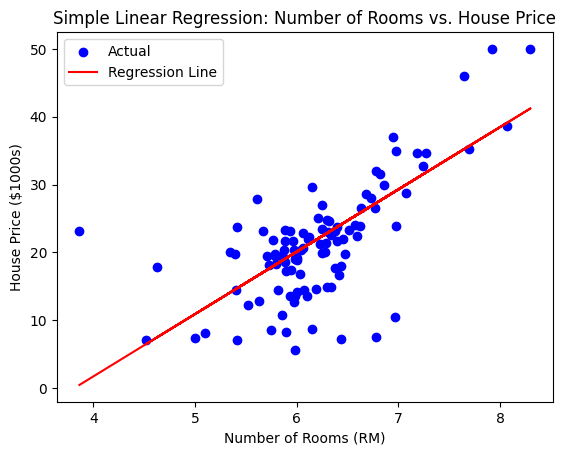

In [20]:
# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Price ($1000s)')
plt.title('Simple Linear Regression: Number of Rooms vs. House Price')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [21]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 40.548380578263284
R-squared score: 0.4512483559980376
